In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n_air = 1
n_ZnSe = 1
n_poly =1

#assume theta = 90 

In [3]:
# calculate refractive index as function of wavenums

def T(wn):
    '''
    Calculate transmissivity as function of wavenumber
    First use dispersion formula for window material to calculate refractive index as function of wavenumber
    Then use Fresnel equations to calculate transmissivty as function of refractive index
    '''
    l = 10000/wn #wavelength
    #n_ZnSe = np.sqrt(4+1.9*l**2/(l**2 -.113))
    n_ZnSe = np.sqrt(1+(4.45813734*l**2/(l**2 -0.200859853**2))+(0.467216334*l**2/(l**2 -0.391371166**2))+(2.89566290*l**2/(l**2 -47.1362108**2)))
    
    #from air to material
    t1 = 2*n_air/(n_air+n_ZnSe)
    
    #from material to air
    t2 = 2*n_ZnSe/(n_air+n_ZnSe)

    T= (t1*t2)**2
    
    return(T, n_ZnSe)

/Users/micol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


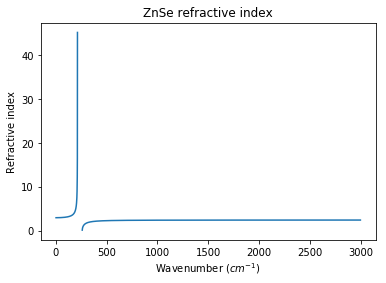

In [4]:
wns = np.arange(1, 3000, 1)

T_vec = np.vectorize(T)
T_ZnSe, n_ZnSe = T_vec(wns)

plt.plot(wns, n_ZnSe) # convert micrometer wavelength into cm-1 wavenumber
plt.title('ZnSe refractive index')
plt.xlabel('Wavenumber $(cm^{-1})$')
plt.ylabel('Refractive index')
plt.show()

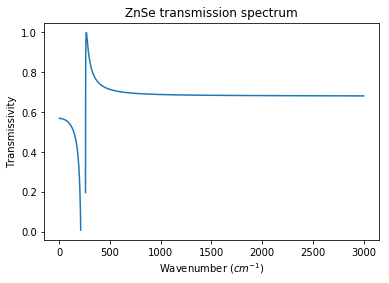

In [5]:
plt.plot(wns, T_ZnSe)
plt.title('ZnSe transmission spectrum')
plt.xlabel('Wavenumber $(cm^{-1})$')
plt.ylabel('Transmissivity')
plt.show()